In [9]:
import pandas as pd
data = pd.read_csv('../data/clean_weather.csv')
data.head(3)

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0


In [10]:
data = data.ffill()

In [11]:
data.isna().sum()

Unnamed: 0       0
tmax             0
tmin             0
rain             0
tmax_tomorrow    0
dtype: int64

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

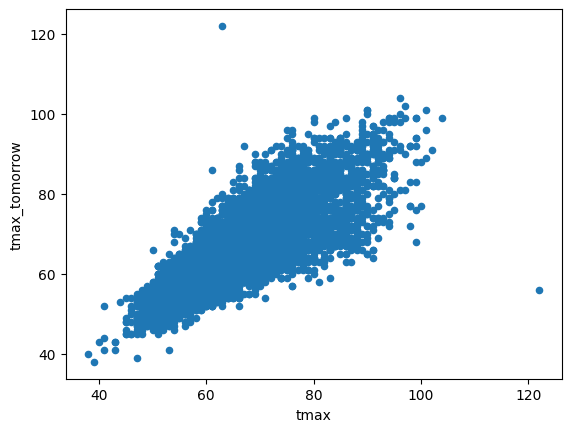

In [12]:
data.plot.scatter("tmax", "tmax_tomorrow")

In [14]:
data.corr(numeric_only=True)

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615604,-0.219941,0.818561
tmin,0.615604,1.000000,-0.019546,0.585572
rain,-0.219941,-0.019546,1.000000,-0.211799
tmax_tomorrow,0.818561,0.585572,-0.211799,1.000000


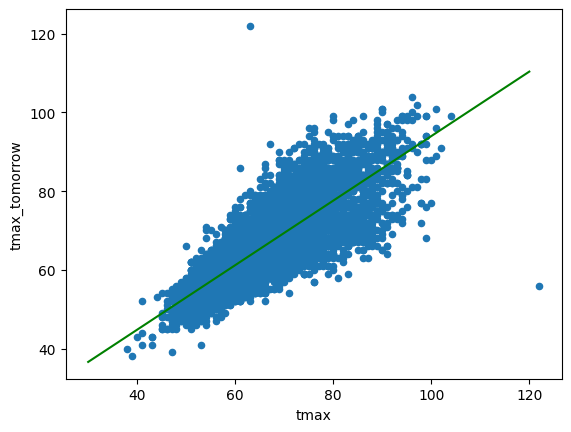

In [15]:
import matplotlib.pyplot as plt

data.plot.scatter("tmax", "tmax_tomorrow")

prediction = lambda x, w1=0.82, b=11.99: x * w1 + b

plt.plot([30, 120], [prediction(30), prediction(120)], 'green')

In [16]:
import numpy as np

def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

In [20]:
print(mse(data["tmax_tomorrow"], prediction(data["tmax"])))
print(mse(data["tmax_tomorrow"], prediction(data["tmax"], 0.82, 13)))

22.897335324598416
24.118285439336727


In [22]:
tmax_bins = pd.cut(data["tmax"], 25)

In [23]:
tmax_bins

0        (58.16, 61.52]
1         (51.44, 54.8]
2         (51.44, 54.8]
3         (51.44, 54.8]
4         (51.44, 54.8]
              ...      
13504    (61.52, 64.88]
13505    (64.88, 68.24]
13506    (64.88, 68.24]
13507     (68.24, 71.6]
13508    (61.52, 64.88]
Name: tmax, Length: 13509, dtype: category
Categories (25, interval[float64, right]): [(37.916, 41.36] < (41.36, 44.72] < (44.72, 48.08] < (48.08, 51.44] ... (108.56, 111.92] < (111.92, 115.28] < (115.28, 118.64] < (118.64, 122.0]]

In [26]:
ratios = (data["tmax_tomorrow"] - 11.99) / data["tmax"]
binned_ratio = ratios.groupby(tmax_bins).mean()
binned_ratio

C:\Users\moham\AppData\Local\Temp\ipykernel_8076\159777238.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_ratio = ratios.groupby(tmax_bins).mean()


tmax
(37.916, 41.36]     0.773904
(41.36, 44.72]      0.762256
(44.72, 48.08]      0.798484
(48.08, 51.44]      0.805470
(51.44, 54.8]       0.803930
(54.8, 58.16]       0.802731
(58.16, 61.52]      0.812934
(61.52, 64.88]      0.821545
(64.88, 68.24]      0.829101
(68.24, 71.6]       0.830022
(71.6, 74.96]       0.825879
(74.96, 78.32]      0.822207
(78.32, 81.68]      0.804168
(81.68, 85.04]      0.800264
(85.04, 88.4]       0.769633
(88.4, 91.76]       0.796350
(91.76, 95.12]      0.798793
(95.12, 98.48]      0.800002
(98.48, 101.84]     0.771846
(101.84, 105.2]     0.805621
(105.2, 108.56]          NaN
(108.56, 111.92]         NaN
(111.92, 115.28]         NaN
(115.28, 118.64]         NaN
(118.64, 122.0]     0.360738
dtype: float64

C:\Users\moham\AppData\Local\Temp\ipykernel_8076\3084527768.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_tmax = data["tmax"].groupby(tmax_bins).mean()


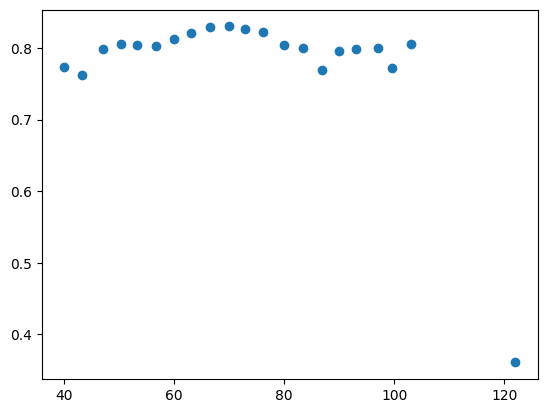

In [27]:
binned_tmax = data["tmax"].groupby(tmax_bins).mean()
plt.scatter(binned_tmax, binned_ratio)